<a href="https://colab.research.google.com/github/Car-enap/1-web/blob/main/arbol_desicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas de los datos:
  Preferencia_Actividad Accesibilidad Disponibilidad Habilidad Asignado
0                Social          Alta             Sí      Baja       Sí
1             Ambiental          Alta             No      Alta       No
2             Educativo          Baja             Sí     Media       Sí
3                Social         Media             Sí      Baja       Sí
4             Ambiental          Alta             Sí      Alta       Sí

Datos después de la conversión:
   Preferencia_Actividad  Accesibilidad  Disponibilidad  Habilidad  Asignado
0                      0              2               1          0         1
1                      1              2               0          2         0
2                      2              0               1          1         1
3                      0              1               1          0         1
4                      1              2               1          2         1

Precisión del modelo: 0.33

Matriz de confu

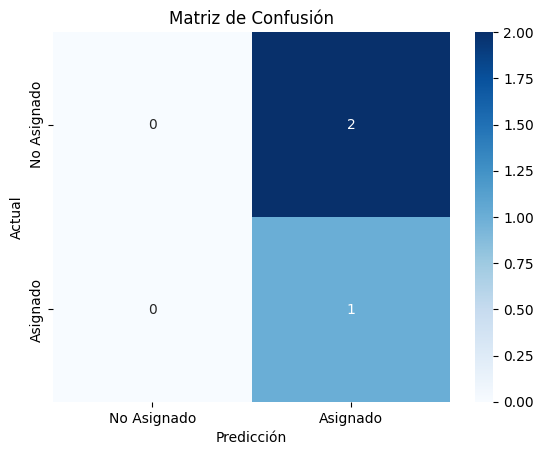

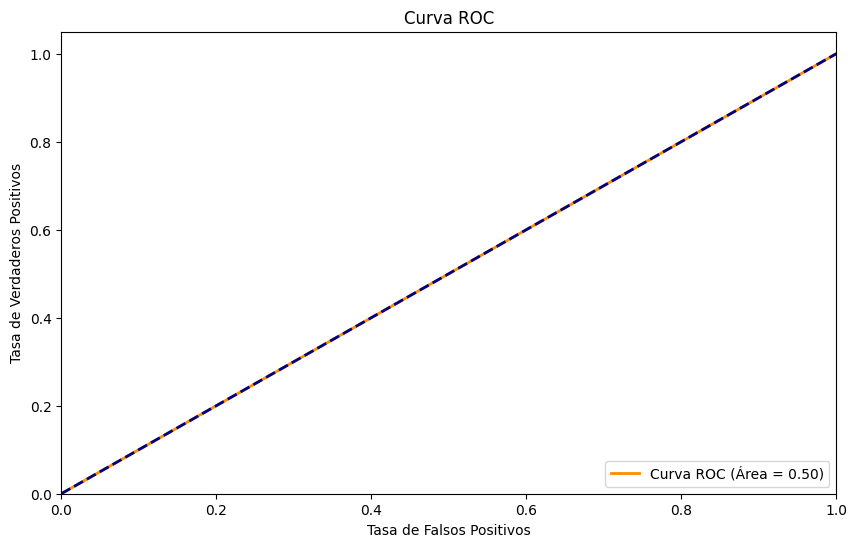

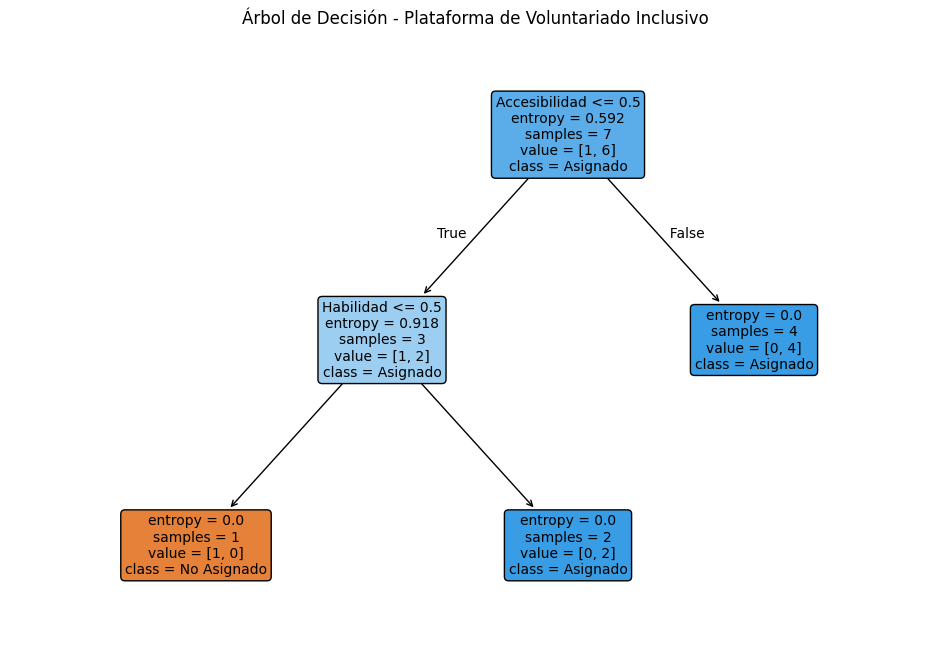

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

data = {
    'Preferencia_Actividad': ['Social', 'Ambiental', 'Educativo', 'Social', 'Ambiental',
                              'Social', 'Educativo', 'Ambiental', 'Social', 'Ambiental'],
    'Accesibilidad': ['Alta', 'Alta', 'Baja', 'Media', 'Alta',
                      'Alta', 'Media', 'Baja', 'Alta', 'Baja'],
    'Disponibilidad': ['Sí', 'No', 'Sí', 'Sí', 'Sí',
                       'No', 'Sí', 'Sí', 'No', 'Sí'],
    'Habilidad': ['Baja', 'Alta', 'Media', 'Baja', 'Alta',
                  'Media', 'Alta', 'Baja', 'Media', 'Alta'],
    'Asignado': ['Sí', 'No', 'Sí', 'Sí', 'Sí',
                 'No', 'Sí', 'No', 'Sí', 'Sí']  # Variable objetivo
}

# Crear DataFrame con los datos simulados
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame para inspección
print("Primeras filas de los datos:")
print(df.head())

# Convertir las variables categóricas a numéricas
df['Preferencia_Actividad'] = df['Preferencia_Actividad'].map({'Social': 0, 'Ambiental': 1, 'Educativo': 2})
df['Accesibilidad'] = df['Accesibilidad'].map({'Alta': 2, 'Media': 1, 'Baja': 0})
df['Disponibilidad'] = df['Disponibilidad'].map({'Sí': 1, 'No': 0})
df['Habilidad'] = df['Habilidad'].map({'Baja': 0, 'Media': 1, 'Alta': 2})
df['Asignado'] = df['Asignado'].map({'Sí': 1, 'No': 0})

# Mostrar el DataFrame después de la conversión
print("\nDatos después de la conversión:")
print(df.head())

# Definir las características (X) y la variable objetivo (y)
X = df[['Preferencia_Actividad', 'Accesibilidad', 'Disponibilidad', 'Habilidad']]
y = df['Asignado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo usando precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# Generar y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Visualizar la matriz de confusión con Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Asignado', 'Asignado'], yticklabels=['No Asignado', 'Asignado'])
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Asignado', 'Asignado'], filled=True, rounded=True, fontsize=10)
plt.title('Árbol de Decisión - Plataforma de Voluntariado Inclusivo')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import random

# Listas de valores posibles
dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
ubicaciones = ["Centro Comunitario", "Escuela Local", "Plaza Principal", "Refugio Temporal", "En línea"]

# Generar datos sintéticos
np.random.seed(42)
num_registros = 100

# Generando los datos
datos = {
    "hora": np.random.randint(0, 24, num_registros),  # Hora del día (0-23)
    "día_semana": np.random.choice(dias_semana, num_registros),  # Día de la semana
    "ubicación": np.random.choice(ubicaciones, num_registros),  # Ubicación
    "reservas_activas": np.random.randint(0, 10, num_registros),  # Cantidad de reservas activas
    "disponibilidad": np.random.choice([0, 1], num_registros, p=[0.4, 0.6])  # 0 = No disponible, 1 = Disponible
}

# Crear DataFrame
df = pd.DataFrame(datos)

# Mostrar las primeras filas
df.head(100)


,hora,día_semana,ubicación,reservas_activas,disponibilidad
0,6,Domingo,Centro Comunitario,1,0
1,19,Miércoles,Plaza Principal,1,0
2,14,Miércoles,Plaza Principal,1,0
3,10,Lunes,Centro Comunitario,5,1
4,7,Miércoles,En línea,2,0
...,...,...,...,...,...
95,6,Miércoles,Plaza Principal,9,1
96,8,Sábado,Centro Comunitario,5,1
97,23,Lunes,Plaza Principal,9,1
98,0,Jueves,Centro Comunitario,9,1


Primeras filas del DataFrame:
   hora dia_semana           ubicacion  reservas_activas  disponibilidad
0     2     Jueves            En línea                 2               1
1    15     Sábado  Centro Comunitario                 1               1
2     3     Martes  Centro Comunitario                 9               1
3    17     Jueves       Escuela Local                 2               0
4    16     Jueves  Centro Comunitario                 2               0

Primeras filas de X:
   hora dia_semana           ubicacion  reservas_activas
0     2     Jueves            En línea                 2
1    15     Sábado  Centro Comunitario                 1
2     3     Martes  Centro Comunitario                 9
3    17     Jueves       Escuela Local                 2
4    16     Jueves  Centro Comunitario                 2


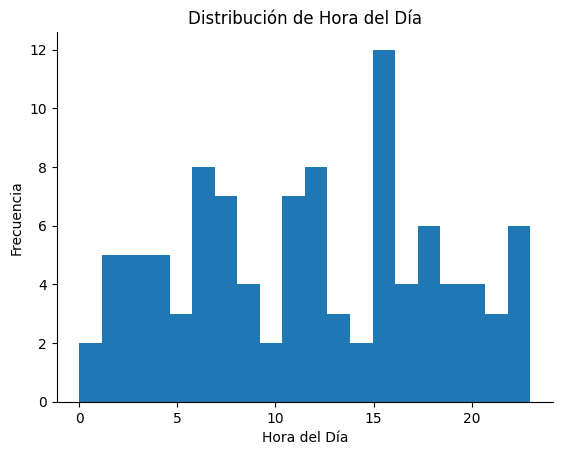

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos (puedes usar el DataFrame previamente creado)
data = {
    'hora': np.random.randint(0, 24, 100),  # Hora del día (0-23)
    'dia_semana': np.random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], 100),  # Día de la semana
    'ubicacion': np.random.choice(['Centro Comunitario', 'Escuela Local', 'Plaza Principal', 'Refugio Temporal', 'En línea'], 100),  # Ubicación
    'reservas_activas': np.random.randint(0, 10, 100),  # Cantidad de reservas activas
    'disponibilidad': np.random.choice([0, 1], 100, p=[0.4, 0.6])  # 0 = No disponible, 1 = Disponible
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Variables predictoras (X) y variable objetivo (Y)
X = df[["hora", "dia_semana", "ubicacion", "reservas_activas"]]
y = df["disponibilidad"]

# Ver las primeras filas de las variables predictoras (X)
print("\nPrimeras filas de X:")
print(X.head())

# Crear histograma de la columna 'hora'
df['hora'].plot(kind='hist', bins=20, title='Distribución de Hora del Día')
plt.gca().spines[['top', 'right']].set_visible(False)  # Eliminar los bordes superiores y derechos del gráfico
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()



Precisión del modelo: 0.33


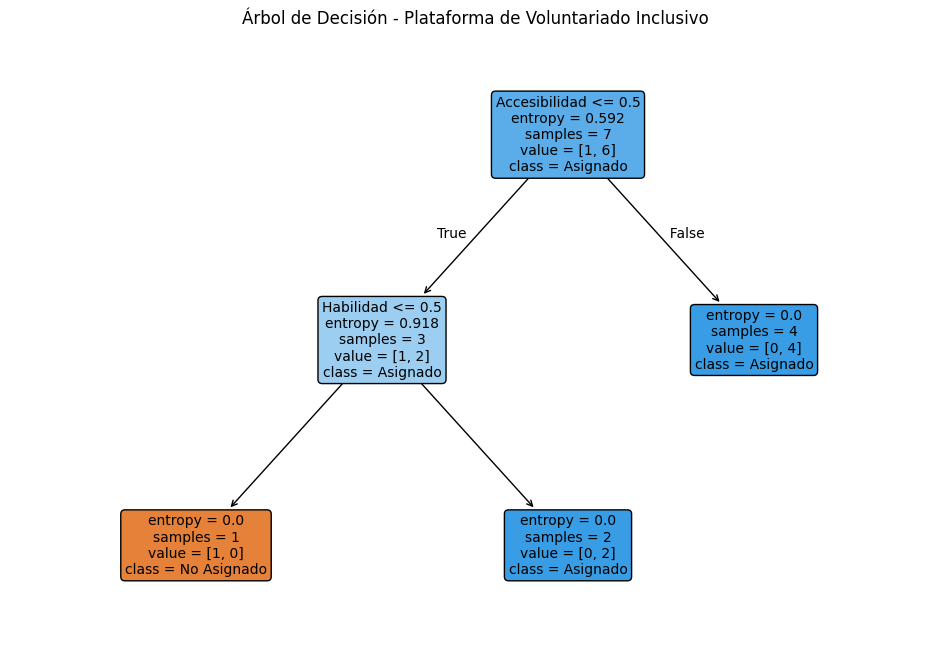

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Crear datos simulados para el proyecto de voluntariado
data = {
    'Preferencia_Actividad': ['Social', 'Ambiental', 'Educativo', 'Social', 'Ambiental',
                              'Social', 'Educativo', 'Ambiental', 'Social', 'Ambiental'],
    'Accesibilidad': ['Alta', 'Alta', 'Baja', 'Media', 'Alta',
                      'Alta', 'Media', 'Baja', 'Alta', 'Baja'],
    'Disponibilidad': ['Sí', 'No', 'Sí', 'Sí', 'Sí',
                       'No', 'Sí', 'Sí', 'No', 'Sí'],
    'Habilidad': ['Baja', 'Alta', 'Media', 'Baja', 'Alta',
                  'Media', 'Alta', 'Baja', 'Media', 'Alta'],
    'Asignado': ['Sí', 'No', 'Sí', 'Sí', 'Sí',
                 'No', 'Sí', 'No', 'Sí', 'Sí']  # Variable objetivo
}

# Crear DataFrame
df = pd.DataFrame(data)

# Convertir las variables categóricas a numéricas
df['Preferencia_Actividad'] = df['Preferencia_Actividad'].map({'Social': 0, 'Ambiental': 1, 'Educativo': 2})
df['Accesibilidad'] = df['Accesibilidad'].map({'Alta': 2, 'Media': 1, 'Baja': 0})
df['Disponibilidad'] = df['Disponibilidad'].map({'Sí': 1, 'No': 0})
df['Habilidad'] = df['Habilidad'].map({'Baja': 0, 'Media': 1, 'Alta': 2})
df['Asignado'] = df['Asignado'].map({'Sí': 1, 'No': 0})

# Variables predictoras (X) y variable objetivo (Y)
X = df[['Preferencia_Actividad', 'Accesibilidad', 'Disponibilidad', 'Habilidad']]
y = df['Asignado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Asignado', 'Asignado'], filled=True, rounded=True, fontsize=10)
plt.title('Árbol de Decisión - Plataforma de Voluntariado Inclusivo')
plt.show()
